In [1]:
#diskritisasi

In [2]:
import pandas as pd
from mdlp.discretization import MDLP
from matplotlib import pyplot

In [3]:
df=pd.read_csv('C:/Users/muhammadilham/skripsi/new/fold0/train.csv')
print(df)

x=df.drop(['Unnamed: 0','timestamp','Label'], axis=1)
print(x)
y=df.drop(['Unnamed: 0','timestamp','Qmc','Qhv','Qlv','Qmv'], axis=1)
#print(y)

x = x.values
transformer = MDLP()
dsc = transformer.fit_transform(x, y)
print(dsc)

     Unnamed: 0         timestamp       Qmc       Qhv       Qlv       Qmv  \
0             1  09/10/2015 12:00  0.681205  0.409015  0.781223  0.757802   
1             2  09/10/2015 16:00  0.833072  0.534224  0.919577  0.902939   
2             3  07/10/2015 15:00  0.899592  0.577629  0.894871  0.899466   
3             4  05/10/2015 02:00  0.030750  0.028381  0.048219  0.043682   
4             5  10/10/2015 05:00  0.060872  0.011686  0.014824  0.021236   
..          ...               ...       ...       ...       ...       ...   
121         122  07/10/2015 10:00  0.796360  0.539232  0.746635  0.763749   
122         123  04/10/2015 01:00  0.080013  0.053422  0.093202  0.089245   
123         124  08/10/2015 18:00  0.751804  0.512521  0.709831  0.725120   
124         125  09/10/2015 21:00  0.399749  0.282137  0.746635  0.670886   
125         126  05/10/2015 10:00  0.667085  0.437396  0.658034  0.663215   

     Label  
0        0  
1        3  
2        3  
3        0  
4        0

In [4]:
dsc = pd.DataFrame(dsc)

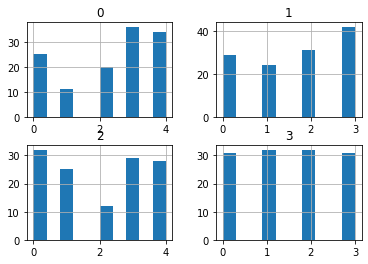

In [5]:
dsc.hist()
pyplot.show()

dsc.to_csv('C:/Users/muhammadilham/skripsi/new/fold0/train_dsc.csv')

In [6]:
y.columns = ['Decision']
y = y['Decision'].replace(0, 'A').replace(1, 'B').replace(2, 'C').replace(3, 'D')
y.to_csv('C:/Users/muhammadilham/skripsi/new/fold0/decision.csv')

#print(y)

In [7]:
#decisiontree

In [8]:
from chefboost import Chefboost as chef

In [9]:
x = pd.read_csv('C:/Users/muhammadilham/skripsi/new/fold0/train_dsc.csv')
y = pd.read_csv('C:/Users/muhammadilham/skripsi/new/fold0/decision.csv')
df = pd.merge(x,y)
df = df.drop('Unnamed: 0',axis=1)

df.head()

df.shape

df.describe()

config = {'algorithm': 'C4.5'}
model = chef.fit(df.copy(), config = config)

C4.5  tree is going to be built...
-------------------------
finished in  1.7224950790405273  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  91.26984126984127 % on  126  instances
Labels:  ['A' 'D' 'C' 'B']
Confusion matrix:  [[30, 0, 0, 0], [0, 31, 0, 0], [1, 0, 30, 8], [1, 0, 1, 24]]
Decision  A  => Accuray:  98.4127 %, Precision:  100.0 %, Recall:  93.75 %, F1:  96.7742 %
Decision  D  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  C  => Accuray:  92.0635 %, Precision:  76.9231 %, Recall:  96.7742 %, F1:  85.7143 %
Decision  B  => Accuray:  92.0635 %, Precision:  92.3077 %, Recall:  75.0 %, F1:  82.7586 %


In [10]:
for index, instance in df.iterrows():
    Prediction = chef.predict(model, instance)
    Actual = instance['Decision']

    if Actual == Prediction:
        classified = True
    else:
        classified = False
        print("*", end='')

    print(Actual," - ",Prediction)

*A  -  C
D  -  D
D  -  D
A  -  A
A  -  A
D  -  D
D  -  D
C  -  C
A  -  A
A  -  A
C  -  C
*B  -  C
B  -  B
D  -  D
C  -  C
B  -  B
C  -  C
A  -  A
A  -  A
B  -  B
C  -  C
C  -  C
D  -  D
C  -  C
C  -  C
D  -  D
D  -  D
*B  -  C
A  -  A
D  -  D
B  -  B
D  -  D
B  -  B
D  -  D
B  -  B
B  -  B
B  -  B
A  -  A
C  -  C
B  -  B
B  -  B
A  -  A
C  -  C
A  -  A
D  -  D
B  -  B
B  -  B
*B  -  C
D  -  D
B  -  B
A  -  A
D  -  D
D  -  D
B  -  B
A  -  A
C  -  C
A  -  A
B  -  B
C  -  C
C  -  C
D  -  D
C  -  C
C  -  C
A  -  A
B  -  B
D  -  D
C  -  C
A  -  A
C  -  C
C  -  C
*B  -  C
B  -  B
C  -  C
*B  -  C
D  -  D
*A  -  B
A  -  A
A  -  A
D  -  D
*B  -  C
*B  -  C
B  -  B
C  -  C
D  -  D
D  -  D
C  -  C
D  -  D
A  -  A
A  -  A
B  -  B
D  -  D
A  -  A
A  -  A
B  -  B
A  -  A
C  -  C
A  -  A
C  -  C
D  -  D
D  -  D
A  -  A
A  -  A
A  -  A
*B  -  C
C  -  C
D  -  D
D  -  D
B  -  B
A  -  A
C  -  C
C  -  C
C  -  C
A  -  A
B  -  B
A  -  A
C  -  C
B  -  B
B  -  B
D  -  D
D  -  D
D  -  D
D  -  D
A  -  A
C  -  

In [11]:
dtest = pd.read_csv('C:/Users/muhammadilham/skripsi/new/fold0/test.csv')
dtest = dtest.drop(['Unnamed: 0',' .1','timestamp'], axis=1)
#print(dtest)

#dtest.head()

for index, instance in dtest.iterrows():
    print(instance.values, "->", chef.predict(model, instance))

[0.8789644  0.90588235 0.80963636 0.85481677] -> B
[0.80355987 0.44235294 0.82709091 0.81892129] -> B
[0.71553398 0.64235294 0.73345455 0.74618088] -> B
[0.69255663 0.63529412 0.34090909 0.4356489 ] -> B
[0.76957929 0.67294118 0.83854545 0.83995125] -> B
[0.88252427 0.84705882 0.90563636 0.92565825] -> B
[0.97702265 1.         0.95109091 0.98961256] -> B
[0.22977346 0.14823529 0.40163636 0.36378709] -> B
[0.05177994 0.         0.00254545 0.00994813] -> B
[0.93915858 0.67529412 0.88836364 0.90866706] -> B
[0.61423948 0.60705882 0.63854545 0.65170195] -> B
[0.00420712 0.00470588 0.         0.        ] -> B
[0.68252427 0.80941176 0.94509091 0.91843097] -> B
[0.6987055  0.62352941 0.88327273 0.8585296 ] -> B
[0.14886731 0.10117647 0.258      0.23397954] -> B
[0.60485437 0.44941176 0.83454545 0.79047983] -> B
[0.33915858 0.45647059 0.60290909 0.56395431] -> B
[0.72038835 0.67529412 0.87709091 0.86156223] -> B
[0.77411003 0.56705882 0.78581818 0.79135844] -> B
[0.01003236 0.01176471 0.020181

In [12]:
moduleName = 'C:/Users/muhammadilham/skripsi/outputs/rules/rules' #this will load outputs/rules/rules.py
tree = chef.restoreTree(moduleName)
prediction = tree.findDecision(dtest)

KeyError: 3